Challenge! Create a function that implements Euler's method and re-write the error analysis cell to use your function

In [16]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [17]:
T = 100.0
dt = 0.02
N = int(T/dt) + 1
t = numpy.linspace(0.0, T, N)

In [18]:
#initial conditions
y0 = 1

u = numpy.array([y0])

#initialize an array to hold the changing values of y

y = numpy.zeros(N)
y[0] = y0

In [19]:
#time-loop using Euler's method

for n in range (1,N):
    u = u + dt* numpy.array([u[0], (-2*y[0] + 2 - numpy.exp(1))])
    y[n] = u[0]

In [20]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

#array that will contain solution of each grid
y_values = numpy.empty_like(dt_values, dtype = numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt) + 1
    t = numpy.linspace(0.0, T, N)
    
    u = numpy.array([y0])
    y = numpy.empty_like(t)
    y[0] = y0
    
    for n in range(1,N):
        u = u + dt*numpy.array([u[0], (-2*y[0] + 2 - numpy.exp(1))])
        y[n] = y[0]
        
    y_values[i] = y.copy()

In [21]:
def get_error(y, dt):
    N = len(y)
    t = numpy.linspace(0.0, T, N)
    
    y_exact = 1 + 0.5*numpy.exp(-4*t) - 0.5*numpy.exp(-2*t)
    
    return dt * numpy.sum(numpy.abs(y - y_exact))

In [22]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    
    error_values[i] = get_error(y_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1.0)

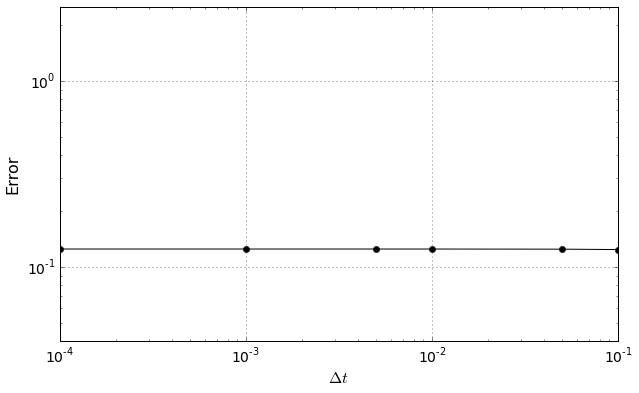

In [23]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;///////////